## Example Problems - Nonlinear Regression

Below are several example nonlinear regression problems and solutions.

1. World Population Growth
2. GISS Surface Temperature Analysis
3. CO2 Trends
4. Estimating Cotton Yields from ET
5. Island Biogeography

## World Population Growth

Using the dataset at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/WorldPopulation.xlsx, develop a logistic model of world population growth.  A **Logistic** model takes the following form:

$ \large p = \frac{K P_0 exp(rt)}{K + P_0 (exp(rt)-1)} $

Steps used in this (and pretty much every) nonliner regression problem follow:

1. Get and visualize the data
2. Determine a model functional form
3. Use scipy.optimize.curve_fit() to run the regression
4. Compare modeled and observed results

['year' 'World Population']
(416, 2)


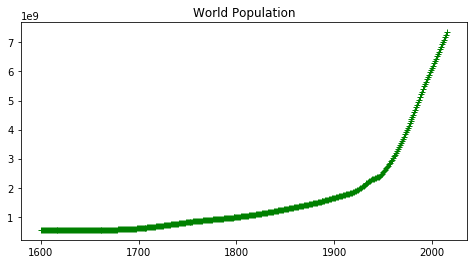

In [2]:
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt

df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/WorldPopulation.xlsx" )

print( df.columns.values )   # print the column headers to the console
print(df.shape)

plt.figure(figsize=(8,4))
plt.plot( df['year'].values,df['World Population'].values, "+", color="green")
plt.title( "World Population")
plt.show()


r2= 0.9299
best-fit coefficients: P0=7.843e+07, K=1.916e+17, r=0.01066


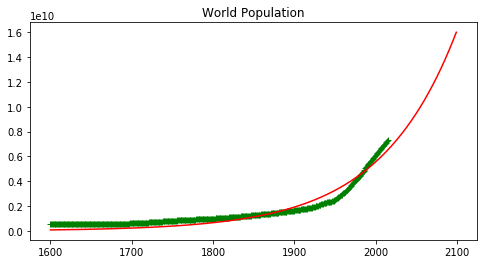

In [3]:
from scipy.optimize import curve_fit

xObs = df['year']
yObs = df['World Population']

# define a model function,
def WorldPopModel(t,P0,K,r):
    t = t-1600
    return K*P0*np.exp(r*t)/(K+P0*np.exp(r*t)-1)
     
# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( WorldPopModel, xObs, yObs, p0=(1,100000001,.05) )

P0 = popt[0]
K = popt[1]
r = popt[2]


# compute r-square value
yMean = np.mean( yObs )
yModeled = WorldPopModel( xObs, P0, K, r )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yModeled-yObs)**2)
r2 = 1-ssr/sst

# be sure to print out the results of you regression, including best-fit parameter values and your r-square value!
print( "r2= {:.4}".format(r2))
print( "best-fit coefficients: P0={:.4}, K={:.4}, r={:.4}".format(P0,K,r))

plt.figure(figsize=(8,4))
plt.plot( xObs,yObs, "+", color="green")

xModeled = np.arange(1600,2100,1)
yModeled = WorldPopModel( xModeled, P0, K, r )
plt.plot(xModeled, yModeled,"-", color='red')

plt.title( "World Population")
plt.show()

## GISS Surface Temperature Analysis

You may be familiar with the "hockey stick" graph describing deviations of global surface temperatures from the historic mean, plotted over the period of 1880 to now.  This (and several related) datasets are described at: https://data.giss.nasa.gov/gistemp/

In this problem, we will model the "anomaly" (the difference between the mean global surface temperature vs. the mean observed global surface temperature, specifically the deviations from the corresponding 1951-1980 means.

A slightly cleaned up version of this datasets is avaiable at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalAnomaly.csv. This contains observed analysis by month, and the annual mean, for the period 1880-2017, in CSV format.

We will develop a regression of temperature anomaly vs. time following the power law:

$\large  Delta = a(Year^b)+c $

We will use the **scipy.optimize.curve_fit()** function to conduct the nonlinear regression.  Based on the results of this regression, predict the expected temperature anomaly in 2040

['Year' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov'
 'Dec' 'J-D']
(138, 14)


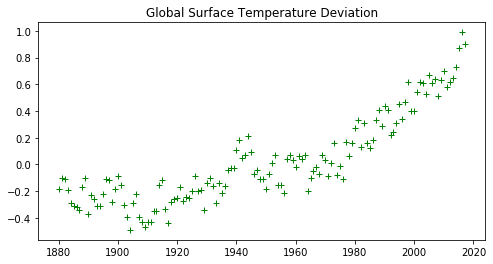

In [4]:
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt

df = pd.read_csv( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalAnomaly.csv", skiprows=1 )

print( df.columns.values )   # print the column headers to the console
print(df.shape)

years = df['Year'].values
deltas = df['J-D'].values

plt.figure(figsize=(8,4))
plt.plot( years, deltas, "+", color="green")
plt.title( "Global Surface Temperature Deviation")
plt.show()

Best fit a=7.38e-07, b=2.88, c=-0.251
R2=0.881


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  


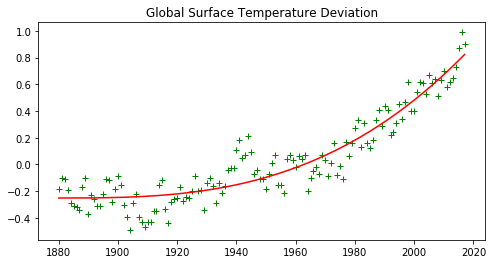

Prediction for 2040=1.430


In [5]:
from scipy.optimize import curve_fit

# define a model
def theTempModel(Years, a,b,c ):
    NYears = Years - 1880
    return c + (a * np.power(NYears,b))

# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theTempModel, years, deltas )

a = popt[0]
b = popt[1]
c = popt[2]

# compute r-square value
xObs = years
yObs = deltas
yMean = np.mean( yObs )
yModeled = theTempModel( xObs, a,b,c )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yObs-yModeled)**2)  
r2 = 1-ssr/sst

print( "Best fit a={:.3}, b={:.3}, c={:.3}".format(a,b,c))
print("R2={:.3}".format(r2))

plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")
plt.plot( xObs, yModeled, "-", color="red")
plt.title( "Global Surface Temperature Deviation")
plt.show()

print( "Prediction for 2040={:.3f}".format(theTempModel(2040,a,b,c)))

## CO2 trends

For this analysis, we will use a dataset of globally average CO2 observations available at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalCO2.csv.  Note that this dataset will require a little manipulation, since we just want annual CO2 means, so we will take advantage of pandas' **groupby()* functionality to aggregate the data prior to analysis.

In [ ]:
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define a model
def theCO2Model(Years, a,b,c):
    NYears = Years - 1958
    return a + (b * np.power(NYears,c))


# get data
df = pd.read_csv( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalCO2.csv", skiprows=8, delim_whitespace=True,
                usecols=[0,4], header=None, names=['Year','CO2'])

df = df.groupby('Year').mean()

yearsCO2 = df.index.values
co2s = df['CO2']


plt.figure(figsize=(8,4))
plt.plot( yearsCO2, co2s, "+", color="green")
plt.title( "Global Annual Mean CO2 (ppm)")
plt.show()


# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theCO2Model, yearsCO2, co2s, p0=(300,1,1) )

a = popt[0]
b = popt[1]
c = popt[2]

# compute r-square value
xObs = yearsCO2
yObs = co2s
yMean = np.mean( co2s )
yModeled = theCO2Model( xObs, a,b,c )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yObs-yModeled)**2)  
r2 = 1-ssr/sst

print( "Best fit a={:.3}, b={:.3}, c={:.3}".format(a,b,c))
print("R2={:.3}".format(r2))


plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")
plt.plot( xObs, yModeled, "-", color="red")
plt.title( "Global Surface Temperature Deviation")
plt.show()

print( "Prediction for 2040={:.3f}".format(theCO2Model(2040,a,b,c)))

### Is there a relationship between Global CO2 and Global Temperature Change?

To explore this question, let's examine the the two datasets together, and model the relationship

In [ ]:
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def theModel(co2s,a,b):
    return a + b*co2s


# get anomaly values for 1958-2016
dfDeltas = pd.read_csv( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalAnomaly.csv", skiprows=1 )
dfDeltas = dfDeltas[(dfDeltas['Year'] >= 1958)]
dfDeltas = dfDeltas[(dfDeltas['Year'] <= 2016)]

# get anomaly values for 1958-2016
dfCO2s = pd.read_csv( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/GlobalCO2.csv", skiprows=8, delim_whitespace=True,
                usecols=[0,4], header=None, names=['Year','CO2'])

dfCO2s = dfCO2s.groupby('Year').mean()

dfCO2s = dfCO2s[(dfCO2s.index >= 1958)]
dfCO2s = dfCO2s[(dfCO2s.index <= 2016)]

co2s = dfCO2s['CO2'].values
deltas = dfDeltas['J-D'].values

# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theModel, co2s, deltas )

a = popt[0]
b = popt[1]

# compute r-square value
xObs = co2s
yObs = deltas
yMean = np.mean( yObs )
yModeled = theModel( xObs, a,b )

r2 = np.corrcoef(yObs,yModeled)[0,1]**2
print( "Best fit a={:.3}, b={:.3}".format(a,b))
print("R2={:.3}".format(r2))

plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")
plt.plot( xObs, yModeled, "-", color="red")
plt.title( "Global Surface Temperature Deviation vs. CO2")
plt.show()


## Estimating Cotton Yield from ET

For this problem use the dataset at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/CottonYield_ET.xlsx, which contains two columns of data: 1) the measured Crop ET (column name="Evapotranspiration (cm)") and the corresponding Cotton yield measure (column name="Cotton Yield (kg/ha)")

Fit two model forms: 

1. A simple linear function for the form $ Yield = a + b ET $, and

2. A nonlinear function of the form $ Yield = a Yield^b

In [ ]:
# Step 1 - get the data
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define a model function,
def theModel(ET,a,b):
    return a * ET**b


# get data
df = pd.read_excel( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/CottonYield_ET.xlsx" )
print( df.columns.values )   # print the column headers to the console
df = df.sort_values(["Evapotranspiration (cm)"])

xObs = df["Evapotranspiration (cm)"]
yObs = df["Cotton Yield (kg/ha)"]

     
# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theModel, xObs, yObs, p0=(1,1) )

a = popt[0]
b = popt[1]


# compute r-square value
yMean = np.mean( yObs )
yModeled = theModel( xObs, a,b )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yModeled-yObs)**2)
r2 = 1-ssr/sst

# be sure to print out the results of you regression, including best-fit parameter values and your r-square value!
print( "r2= {:.4}".format(r2))
print( "best-fit coefficients: a={:.4}, b={:.4}".format(a,b))


plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")

plt.plot(xObs, theModel(xObs,a,b), "-", color='red')

plt.title( "Cotton Yield vs. Crop Water Use")
plt.show()



## Island Biogeography 

Does island area and/or proximity to other islands affect the richness of bird species?  We will explore this using a dataset collected in the Solomon Islands (the dataset is available at http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/IslandBirds.csv ).  This datasets contains species counts, island areas, and distance from the island to source colonists for a number of islands in the Solomons.  The model we will fit is:

$ \large S = a * Area^b $

where S=species, A=area, a,b are parameters.

In [ ]:
# Step 1 - get the data
import numpy as np     # because it's numpy
import pandas as pd    # data library
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define a model function,
def theModel(Area,a,b):
    return a*(Area**b)

# get data
df = pd.read_csv( "http://explorer.bee.oregonstate.edu/Topic/Modeling/Data/IslandBirds.csv" )
print( df.columns.values )   # print the column headers to the console

# visualize it
sppCount = df["SppCount"]
area = df["Area(mi2)"]
distance = df["Distance(mi)"]
 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(area, sppCount, "+", color="green")
plt.xlabel = "Area"
plt.ylabel = "Spp Count"

plt.subplot(1,2,2)
plt.plot(distance,sppCount, "o", color='red')
plt.xlabel = "Distance"
plt.ylabel = "Spp Count"

plt.show()

# run nonlinear regression with curve_fit()
popt,pcov = curve_fit( theModel, area, sppCount, p0=(1,1) )

a = popt[0]
b = popt[1]

# compute r-square value
xObs = area
yObs = sppCount

yMean = np.mean( yObs )
yModeled = theModel( xObs, a,b )

sst = np.sum( (yObs-yMean)**2 )
ssr = np.sum( (yModeled-yObs)**2)
r2 = 1-ssr/sst

# be sure to print out the results of you regression, including best-fit parameter values and your r-square value!
print( "r2= {:.4}".format(r2))
print( "best-fit coefficients: a={:.4}, b={:.4}".format(a,b))

plt.figure(figsize=(8,4))
plt.plot( xObs, yObs, "+", color="green")

xPlot = np.arange(0,area.max())
plt.plot(xPlot, theModel(xPlot,a,b), "-", color='red')

plt.title( "SppCount vs. Area using Power Law Model")
plt.show()
